In [1]:
'''
    API route: https://reports.merryfield.com/api/v1/receipts/retailer-share
    
    Input brand_id, start_date, and end_date below
'''

'\n    API route: https://reports.merryfield.com/api/v1/receipts/retailer-share\n    \n    Input brand_id, start_date, and end_date below\n'

In [2]:
import os
from dotenv import load_dotenv

load_dotenv()

brand_id = '5SyZg5X6MDE6caxIRI1rqv'
start_date = '2022-11-03'
end_date = '2022-12-03'

In [3]:
import requests

def fetch():
    url = 'https://reports.merryfield.com/api/v1/receipts/retailer-share'
    headers = {
        'Accept': 'application/json',
        'Content-Type': 'application/json',
        'timeout': '5000',
        'cookie': 'adminToken=' + os.environ.get('ADMIN_TOKEN')
    }
    params = {
        'brand_id': brand_id,
        'start_date': start_date,
        'end_date': end_date
    }
    response = requests.get(url, headers=headers, params=params)
    data = response.json()
    
    return data

In [4]:
def get_labels_and_retailers(data):
    retailers = {}
    under_two = 0
    
    for trade in data:
        for retailer in trade['retailers']:
            
            class_of_trade = trade['class_of_trade']
            retailer_name = retailer['retailer_name']
            brand_share = retailer['brand_share']
            
            if class_of_trade.lower() == 'na' or retailer_name.lower() == 'other' and brand_share < 2:
                under_two += brand_share
            elif retailer_name.lower() != 'other':
                retailers[retailer_name] = brand_share
            elif retailer_name.lower() == 'other' and brand_share > 2:
                retailers[f'Other {class_of_trade}'] = brand_share
                
    
    retailers['All Other'] = under_two
    retailers = dict(sorted(retailers.items(), key=lambda item: item[1], reverse=True))

    return retailers


Brand ID: 5SyZg5X6MDE6caxIRI1rqv
Start data (yyyy-mm-dd): 2022-11-03
End data (yyyy-mm-dd): 2022-12-03


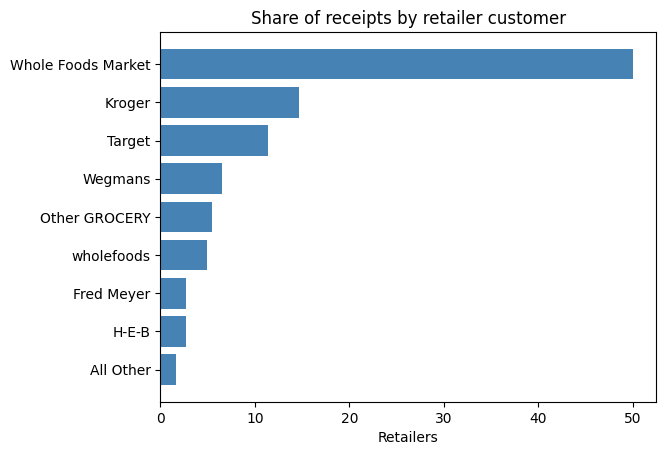

In [5]:
import matplotlib.pyplot as plt
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

plt.rcdefaults()
fig, ax = plt.subplots()

data = fetch()
retailers = get_labels_and_retailers(data)

y_pos = np.arange(len(retailers))
percentage = retailers.values()
ax.barh(y_pos, percentage, align='center',
        color='steelblue', ecolor='black')
ax.set_yticks(y_pos)
ax.set_yticklabels(retailers.keys())
ax.invert_yaxis()  
ax.set_xlabel('Retailers')
ax.set_title('Share of receipts by retailer customer')

plt.show()
